In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

## Generate toy data
We're using 30 samples from a 1D cosine function with Gaussian noise added.

What we'd like is for our regression model to learn the generating function from these 30 samples, without overfitting to the noise.

In [2]:
def generating_function(x):
    return np.cos(1.5 * np.pi * x)

num_samples = 30

X = np.sort(np.random.rand(num_samples))
y = generating_function(X) + np.random.randn(num_samples) * 0.1

Let's print a few samples from the dataset...

In [3]:
for a, b in zip(X[:10], y[:10]):
    print("input = {0}, output = {1}".format(a, b))

input = 0.0599526545255884, output = 0.9611374652176679
input = 0.14315744315784706, output = 0.6830297627495819
input = 0.15283831029160444, output = 0.761690643372219
input = 0.1781434398465267, output = 0.8333720915883429
input = 0.23911628745721814, output = 0.24999096592539333
input = 0.24292185494009078, output = 0.4225318580505736
input = 0.2533631323134674, output = 0.5083334255863581
input = 0.27448384216934574, output = 0.3084200142208161
input = 0.31374446559351554, output = 0.1829410457826099
input = 0.34741382669886944, output = -0.19755640154162862


Now we'll plot these (noisy) samples together with the actual generating function.

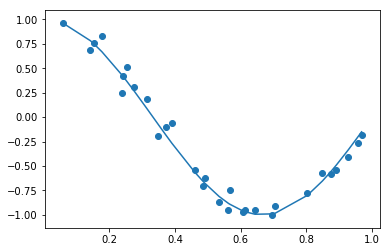

In [4]:
plt.plot(X, generating_function(X))
plt.scatter(X, y)
plt.show()

## Building a first model

Here, we're building linear polynomial models of degrees 2, 4 and 15.

In [5]:
polynomial_features = PolynomialFeatures(degree=15)
linear_regression = LinearRegression()
#linear_regression = Lasso(alpha=0.01)
#linear_regression = Ridge(alpha=1)
linear_regression = ElasticNet(alpha=0.001)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])

# Note that we can't just use X itself as sklearn no longer allows 1D arrays here,
# so we change it to a 2D array
pipeline.fit(X[:, np.newaxis], y)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=15, include_bias=True, interaction_only=False)), ('linear_regression', ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])

## Visualising the model

Instead of formally computing accuracy metrics (e.g. mean-squared error), we're just going to plot a graph showing how the model looks compared to the actual generating function over the test set.

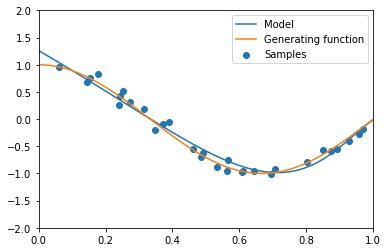

In [6]:
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, generating_function(X_test), label="Generating function")
plt.scatter(X, y, label="Samples")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

Let's print out the coefficients of the linear model to see what it considers most important...

In [7]:
pipeline.named_steps['linear_regression'].coef_

array([ 0.        , -3.59573501, -0.69968337,  0.        ,  1.04784915,
        1.2635979 ,  0.9853643 ,  0.49606813,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.06009064, -0.27387023,
       -0.44018514])